In [1]:
# imports and setup 
import pandas as pd
import scipy as sc
import numpy as np

import seaborn as sns

#%matplotlib notebook
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

In [36]:
df = pd.read_excel('DatasetEN.xlsx',index_col=0) #load data
print(df.shape)
df

(49028, 22)


,Status,Target date,Closed,Category,Subcategory,Call Type,Department,Call Date,Number of days current,Department.1,...,Time spent for Second Line,Date/time of creation,Date/time of change,Closure Date,Completion Date,Duration,Actual duration,Escalated,Major call,Entry
Line,,,,,,,,,,,,,,,,,,,,,
Second line call,Onterecht aangemaakt,2015-01-23 10:54:00,True,ICT SAP,SD (Verkoop),ICT Verstoring,NaN,2013-11-22 08:54:00,288,Klantenservice - Klantenservice-A - K&O,...,00:00:00,2013-11-22 08:54:34,2015-01-15 13:14:12,2015-01-15 13:14:00,2015-01-15 13:14:00,2 uur,1900-05-22 09:20:00,True,NaN,E-mail
Second line call,Afgehandeld,2015-09-18 11:52:00,True,ICT GIS,Smallworld NRM,ICT Verstoring,NaN,2014-06-04 11:52:00,322,Aanleg Leidingen - Aansluitleidingen - K&O,...,00:00:00,2014-06-04 11:52:15,2015-09-10 12:52:18,2015-09-10 12:52:00,2015-09-10 12:52:00,5 dagen,1900-06-08 09:30:00,True,NaN,E-mail
Second line call,Afgehandeld,2016-12-30 18:00:00,True,ICT GIS,Arcgis,ICT Verstoring,NaN,2014-07-21 15:15:00,183,NaN,...,00:00:00,2014-07-21 15:21:58,2015-04-08 07:57:11,2015-04-08 07:57:00,2015-04-08 07:57:00,5 dagen,1900-03-31 01:12:00,True,NaN,Telefonisch
Second line call,Afgehandeld,2015-07-17 15:45:00,True,ICT Infra,Netwerkverbinding,ICT Verstoring,NaN,2014-10-09 15:45:00,169,Productie - Centraal - K&O,...,00:00:00,2014-10-09 15:45:51,2015-06-16 14:28:58,2015-06-16 14:28:00,2015-06-16 14:28:00,5 dagen,1900-03-24 07:13:00,True,NaN,E-mail
Second line call,Afgehandeld,2015-02-27 10:42:00,True,ICT Overige applicaties,Kijk op water,ICT Vraag,NaN,2014-10-20 10:42:00,75,Onderhoud & Inspectie - Inspectie & Kwal. - K&O,...,00:00:00,2014-10-20 10:42:31,2015-02-05 09:10:00,2015-02-05 09:09:00,2015-02-05 09:09:00,5 dagen,1900-02-06 06:57:00,True,NaN,E-mail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
First line call,Omgezet naar wijziging,2021-03-15 07:58:00,True,ICT GIS,Smallworld NRM,ICT Service Request,K&O - Aanleg leidingen - HAL,2021-03-12 15:58:00,0,Aanleg leidingen - K&O,...,00:00:00,2021-03-12 15:58:11,2021-03-12 16:24:37,2021-03-12 16:24:00,2021-03-12 16:24:00,4 uur,00:26:00,False,NaN,E-mail
First line call,Onterecht aangemaakt,2021-03-15 11:00:00,True,-,-,ICT Vraag,BO - ICT - ICT Service & Infra,2021-03-13 10:32:00,0,ICT - ICT Services & Infra - BO,...,00:00:00,2021-03-13 10:32:51,2021-03-13 14:13:56,2021-03-13 14:13:00,2021-03-13 14:13:00,4 uur,00:00:00,False,NaN,E-mail
First line call,Onterecht aangemaakt,2021-03-15 11:00:00,True,-,-,ICT Vraag,BO - ICT - ICT Service & Infra,2021-03-13 12:22:00,0,ICT - ICT Services & Infra - BO,...,00:00:00,2021-03-13 12:22:56,2021-03-13 14:14:02,2021-03-13 14:14:00,2021-03-13 14:14:00,4 uur,00:00:00,False,NaN,E-mail


In [37]:
df.keys()

Index(['Status', 'Target date', 'Closed', 'Category', 'Subcategory',
       'Call Type', 'Department', 'Call Date', 'Number of days current',
       'Department.1', 'Operator Group', 'Time spent for First line',
       'Time spent for Second Line', 'Date/time of creation',
       'Date/time of change', 'Closure Date', 'Completion Date', 'Duration',
       'Actual duration', 'Escalated', 'Major call', 'Entry'],
      dtype='object')

In [38]:
entry_type = df['Entry']
entry_type.value_counts()

E-mail                27559
Telefonisch           15539
Persoonlijk            3725
SelfServiceDesk        1544
Topdesk Formulier       575
Zelf geconstateerd       32
Skype                    27
FO-mail                  25
PA-mail                   2
Name: Entry, dtype: int64

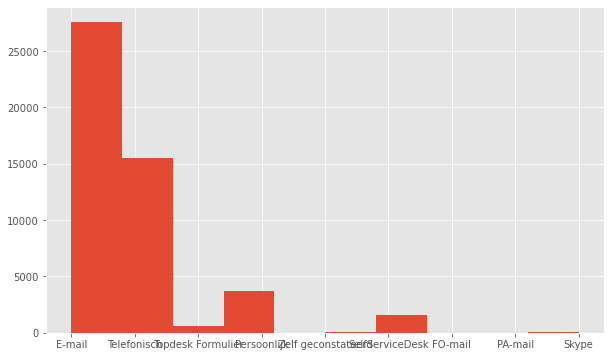

In [39]:
entry_type.hist()

In [40]:
df = df[df["Entry"].str.contains("E-mail", case = False) | df["Entry"].str.contains("Telefonisch", case = False) | df["Entry"].str.contains("Persoonlijk", case = False)| df["Entry"].str.contains("SelfServiceDesk", case = False)]

In [41]:
df.shape

(48367, 22)

In [44]:
df.head()

,Status,Target date,Closed,Category,Subcategory,Call Type,Department,Call Date,Number of days current,Department.1,...,Time spent for Second Line,Date/time of creation,Date/time of change,Closure Date,Completion Date,Duration,Actual duration,Escalated,Major call,Entry
Line,,,,,,,,,,,,,,,,,,,,,
Second line call,Onterecht aangemaakt,2015-01-23 10:54:00,True,ICT SAP,SD (Verkoop),ICT Verstoring,NaN,2013-11-22 08:54:00,288,Klantenservice - Klantenservice-A - K&O,...,00:00:00,2013-11-22 08:54:34,2015-01-15 13:14:12,2015-01-15 13:14:00,2015-01-15 13:14:00,2 uur,1900-05-22 09:20:00,True,NaN,E-mail
Second line call,Afgehandeld,2015-09-18 11:52:00,True,ICT GIS,Smallworld NRM,ICT Verstoring,NaN,2014-06-04 11:52:00,322,Aanleg Leidingen - Aansluitleidingen - K&O,...,00:00:00,2014-06-04 11:52:15,2015-09-10 12:52:18,2015-09-10 12:52:00,2015-09-10 12:52:00,5 dagen,1900-06-08 09:30:00,True,NaN,E-mail
Second line call,Afgehandeld,2016-12-30 18:00:00,True,ICT GIS,Arcgis,ICT Verstoring,NaN,2014-07-21 15:15:00,183,NaN,...,00:00:00,2014-07-21 15:21:58,2015-04-08 07:57:11,2015-04-08 07:57:00,2015-04-08 07:57:00,5 dagen,1900-03-31 01:12:00,True,NaN,Telefonisch
Second line call,Afgehandeld,2015-07-17 15:45:00,True,ICT Infra,Netwerkverbinding,ICT Verstoring,NaN,2014-10-09 15:45:00,169,Productie - Centraal - K&O,...,00:00:00,2014-10-09 15:45:51,2015-06-16 14:28:58,2015-06-16 14:28:00,2015-06-16 14:28:00,5 dagen,1900-03-24 07:13:00,True,NaN,E-mail
Second line call,Afgehandeld,2015-02-27 10:42:00,True,ICT Overige applicaties,Kijk op water,ICT Vraag,NaN,2014-10-20 10:42:00,75,Onderhoud & Inspectie - Inspectie & Kwal. - K&O,...,00:00:00,2014-10-20 10:42:31,2015-02-05 09:10:00,2015-02-05 09:09:00,2015-02-05 09:09:00,5 dagen,1900-02-06 06:57:00,True,NaN,E-mail


In [45]:
df.keys()

Index(['Status', 'Target date', 'Closed', 'Category', 'Subcategory',
       'Call Type', 'Department', 'Call Date', 'Number of days current',
       'Department.1', 'Operator Group', 'Time spent for First line',
       'Time spent for Second Line', 'Date/time of creation',
       'Date/time of change', 'Closure Date', 'Completion Date', 'Duration',
       'Actual duration', 'Escalated', 'Major call', 'Entry'],
      dtype='object')

In [49]:
df = df[['Status', 'Target date','Closed','Category','Subcategory','Call Type','Department.1','Operator Group','Date/time of creation','Closure Date','Duration','Entry']]

In [50]:
df.head()

,Status,Target date,Closed,Category,Subcategory,Call Type,Department.1,Operator Group,Date/time of creation,Closure Date,Duration,Entry
Line,,,,,,,,,,,,
Second line call,Onterecht aangemaakt,2015-01-23 10:54:00,True,ICT SAP,SD (Verkoop),ICT Verstoring,Klantenservice - Klantenservice-A - K&O,ICT ServiceDesk,2013-11-22 08:54:34,2015-01-15 13:14:00,2 uur,E-mail
Second line call,Afgehandeld,2015-09-18 11:52:00,True,ICT GIS,Smallworld NRM,ICT Verstoring,Aanleg Leidingen - Aansluitleidingen - K&O,ICT ServiceDesk,2014-06-04 11:52:15,2015-09-10 12:52:00,5 dagen,E-mail
Second line call,Afgehandeld,2016-12-30 18:00:00,True,ICT GIS,Arcgis,ICT Verstoring,NaN,ICT Technisch beheer,2014-07-21 15:21:58,2015-04-08 07:57:00,5 dagen,Telefonisch
Second line call,Afgehandeld,2015-07-17 15:45:00,True,ICT Infra,Netwerkverbinding,ICT Verstoring,Productie - Centraal - K&O,ICT Technisch beheer,2014-10-09 15:45:51,2015-06-16 14:28:00,5 dagen,E-mail
Second line call,Afgehandeld,2015-02-27 10:42:00,True,ICT Overige applicaties,Kijk op water,ICT Vraag,Onderhoud & Inspectie - Inspectie & Kwal. - K&O,ICT Technisch beheer,2014-10-20 10:42:31,2015-02-05 09:09:00,5 dagen,E-mail


In [51]:
df.describe()

<ipython-input-51-ea8415b8a3ee>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()
<ipython-input-51-ea8415b8a3ee>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()
<ipython-input-51-ea8415b8a3ee>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,Status,Target date,Closed,Category,Subcategory,Call Type,Department.1,Operator Group,Date/time of creation,Closure Date,Duration,Entry
count,48367,48367,48367,48367,48367,48367,41174,48367,48367,48367,48367,48367
unique,5,45263,1,28,194,24,76,10,48352,44488,9,4
top,Afgehandeld,2018-08-10 07:30:00,True,ICT Infra,-,ICT Vraag,ICT - ICT Services & Infra - BO,ICT ServiceDesk,2016-04-06 09:23:03,2018-12-17 09:49:51,2 uur,E-mail
freq,29829,22,48367,11557,10544,18467,2954,43875,2,16,33821,27559
first,NaN,2014-12-23 16:24:00,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-22 08:54:34,2015-01-05 07:55:43,NaN,NaN
last,NaN,2024-07-31 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-13 13:33:57,2021-03-13 14:14:00,NaN,NaN


In [52]:
df.shape

(48367, 12)

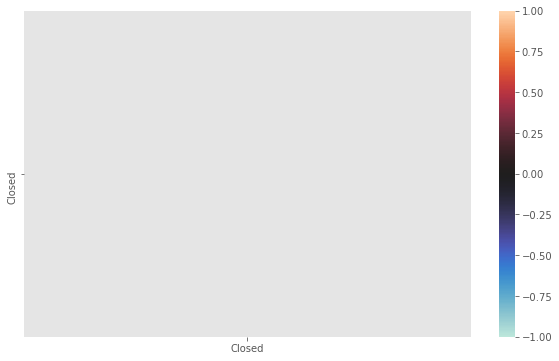

In [61]:
correlation = df.corr()
heatmap = sns.heatmap(correlation, vmin=-1, vmax=1, center=0)


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


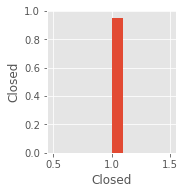

In [71]:
df['actual duration'] = df['Closure Date'] - df['Date/time of creation']

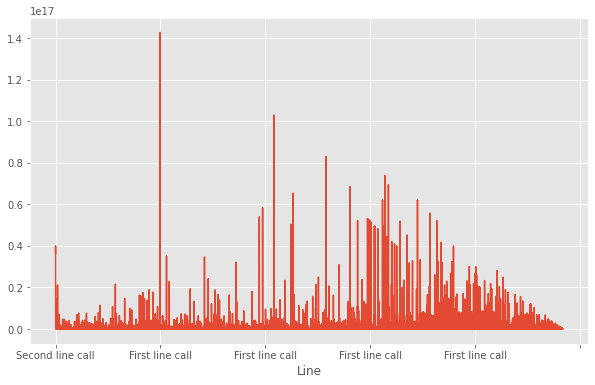

In [75]:
df['actual duration'].